In [ ]:
# For numerical operations
import numpy as np
# For data manipulation and analysis
import pandas as pd
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Load a CSV file
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Datasets/car_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Cleaning

##Handle Missing Data

In [ ]:
# Identify Missing Data
missing_data = data.isnull().sum()
print("Missing Data (Before Cleaning):\n", missing_data)

Missing Data (Before Cleaning):
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [ ]:
data[['Engine HP', 'Engine Cylinders', 'Number of Doors']].describe()

,Engine HP,Engine Cylinders,Number of Doors
count,11845.00000,11884.000000,11908.000000
mean,249.38607,5.628829,3.436093
std,109.19187,1.780559,0.881315
min,55.00000,0.000000,2.000000
25%,170.00000,4.000000,2.000000
50%,227.00000,6.000000,4.000000
75%,300.00000,6.000000,4.000000
max,1001.00000,16.000000,4.000000


In [ ]:
data[['Engine Fuel Type']].value_counts()

,count
Engine Fuel Type,
regular unleaded,7172
premium unleaded (required),2009
premium unleaded (recommended),1523
flex-fuel (unleaded/E85),899
diesel,154
electric,66
flex-fuel (premium unleaded required/E85),54
flex-fuel (premium unleaded recommended/E85),26
flex-fuel (unleaded/natural gas),6


In [ ]:
data[['Engine HP']].value_counts()

,count
Engine HP,
200.0,456
170.0,351
210.0,320
240.0,268
285.0,246
...,...
573.0,1
622.0,1
372.0,1


In [ ]:
data[['Engine Cylinders']].value_counts()

,count
Engine Cylinders,
4.0,4752
6.0,4489
8.0,2031
12.0,230
5.0,225
10.0,68
0.0,56
3.0,30
16.0,3


In [ ]:
data[['Number of Doors']].value_counts()

,count
Number of Doors,
4.0,8353
2.0,3160
3.0,395


In [ ]:
data[['Market Category']].value_counts()

,count
Market Category,
Crossover,1110
Flex Fuel,872
Luxury,855
"Luxury,Performance",673
Hatchback,641
...,...
"Exotic,Luxury,High-Performance,Hybrid",1
"Flex Fuel,Factory Tuner,Luxury,High-Performance",1
"Crossover,Exotic,Luxury,Performance",1


In [ ]:
# Handle Missing Data
data['Engine Fuel Type'] = data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0])  # Replace missing with mode
data['Engine HP'] = data['Engine HP'].fillna(data['Engine HP'].median())  # Replace missing with median
data['Engine Cylinders'] = data['Engine Cylinders'].fillna(data['Engine Cylinders'].median())  # Replace missing with median
data['Number of Doors'] = data['Number of Doors'].fillna(data['Number of Doors'].median())  # Replace missing with median
data['Market Category'] = data['Market Category'].fillna('unknown')  # Replace missing with 'unknown'

##Data Type Conversion

In [ ]:
# Checking data types
data.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


In [ ]:
# Change datatype of Engine HP to integer
data['Engine HP'] = data['Engine HP'].astype(int)

# Change datatype of Engine Cylinders to integer
data['Engine Cylinders'] = data['Engine Cylinders'].astype(int)

# Change datatype of Number of Doors to integer
data['Number of Doors'] = data['Number of Doors'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11914 non-null  object
 1   Model              11914 non-null  object
 2   Year               11914 non-null  int64 
 3   Engine Fuel Type   11914 non-null  object
 4   Engine HP          11914 non-null  int64 
 5   Engine Cylinders   11914 non-null  int64 
 6   Transmission Type  11914 non-null  object
 7   Driven_Wheels      11914 non-null  object
 8   Number of Doors    11914 non-null  int64 
 9   Market Category    11914 non-null  object
 10  Vehicle Size       11914 non-null  object
 11  Vehicle Style      11914 non-null  object
 12  highway MPG        11914 non-null  int64 
 13  city mpg           11914 non-null  int64 
 14  Popularity         11914 non-null  int64 
 15  MSRP               11914 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.5

##Filter Data

In [ ]:
# Filter Data for Cars from 1995 and Later
data = data[data['Year'] >= 1995]

##String Operations

In [ ]:
# Standardize Text Entries
data['Vehicle Style'] = data['Vehicle Style'].str.lower()
data['Market Category'] = data['Market Category'].str.lower()

In [ ]:
# Recheck for missing values
cleaned_missing_data = data.isnull().sum()
print("Missing Data (After Cleaning):\n", cleaned_missing_data)

Missing Data (After Cleaning):
 Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


#Feature Engineering

##Create New Columns

In [ ]:
# Create a column for Total MPG (average of city mpg and highway MPG)
data['Total MPG'] = (data['city mpg'] + data['highway MPG']) / 2
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Total MPG
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"factory tuner,luxury,high-performance",Compact,coupe,26,19,3916,46135,22.5
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"luxury,performance",Compact,convertible,28,19,3916,40650,23.5
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"luxury,high-performance",Compact,coupe,28,20,3916,36350,24.0
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"luxury,performance",Compact,coupe,28,18,3916,29450,23.0
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,luxury,Compact,convertible,28,18,3916,34500,23.0


In [ ]:
# Create a column for Price per HP (MSRP / Engine HP)
data['Price per HP'] = data['MSRP'] / data['Engine HP']

# Handle cases where Engine HP might be 0 or NaN after calculation
data['Price per HP'] = data['Price per HP'].replace([float('inf'), -float('inf')], 0)
data['Price per HP'] = data['Price per HP'].fillna(0)

data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Total MPG,Price per HP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"factory tuner,luxury,high-performance",Compact,coupe,26,19,3916,46135,22.5,137.716418
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"luxury,performance",Compact,convertible,28,19,3916,40650,23.5,135.500000
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"luxury,high-performance",Compact,coupe,28,20,3916,36350,24.0,121.166667
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"luxury,performance",Compact,coupe,28,18,3916,29450,23.0,128.043478
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,luxury,Compact,convertible,28,18,3916,34500,23.0,150.000000


#Exploratory data Analysis

##Descriptive Statistics

In [ ]:
# Summary statistics
data[['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']].describe()

,Engine HP,MSRP,Popularity,highway MPG,city mpg
count,11090.000000,1.109000e+04,11090.000000,11090.000000,11090.000000
mean,256.527322,4.345168e+04,1569.377998,26.866276,19.901353
std,108.445256,6.134721e+04,1453.983754,9.021406,9.222982
min,55.000000,2.000000e+03,2.000000,12.000000,7.000000
25%,177.000000,2.305050e+04,549.000000,22.000000,16.000000
50%,240.000000,3.130250e+04,1385.000000,26.000000,18.000000
75%,304.000000,4.350375e+04,2009.000000,31.000000,22.000000
max,1001.000000,2.065902e+06,5657.000000,354.000000,137.000000


##Group Analysis

In [ ]:
# Average MSRP and Popularity grouped by Driven_Wheels
data.groupby('Driven_Wheels')[['MSRP', 'Popularity']].mean()

,MSRP,Popularity
Driven_Wheels,,
all wheel drive,59617.830670,1512.183585
four wheel drive,38460.878220,1760.016393
front wheel drive,24773.764573,1407.581112
rear wheel drive,60282.540743,1766.350065


In [ ]:
# Average MSRP and Popularity grouped by Vehicle Size
data.groupby('Vehicle Size')[['MSRP', 'Popularity']].mean()

,MSRP,Popularity
Vehicle Size,,
Compact,37685.591268,1477.895959
Large,57037.375095,1899.088617
Midsize,40874.022084,1456.737398


In [ ]:
# Average MSRP and Popularity grouped by Engine Cylinders
data.groupby('Engine Cylinders')[['MSRP', 'Popularity']].mean()

,MSRP,Popularity
Engine Cylinders,,
0,5.061509e+04,1918.696429
3,1.354700e+04,791.950000
4,2.556867e+04,1438.382253
5,2.285833e+04,856.418719
6,3.646044e+04,1690.590424
8,6.555978e+04,1756.037368
10,1.841238e+05,1830.029412
12,2.901637e+05,838.933628
16,1.757224e+06,820.000000


##Visualizations

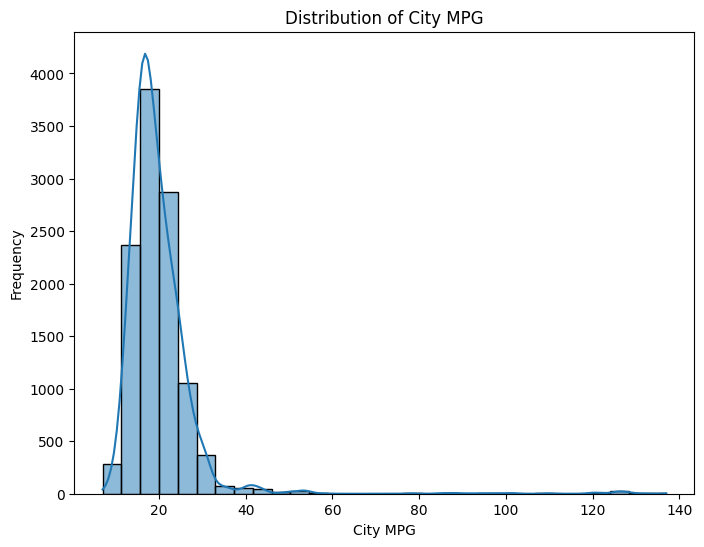

In [ ]:
# Histogram for city mpg
plt.figure(figsize=(8, 6))
sns.histplot(data['city mpg'], bins=30, kde = True)
plt.title('Distribution of City MPG')
plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.show()

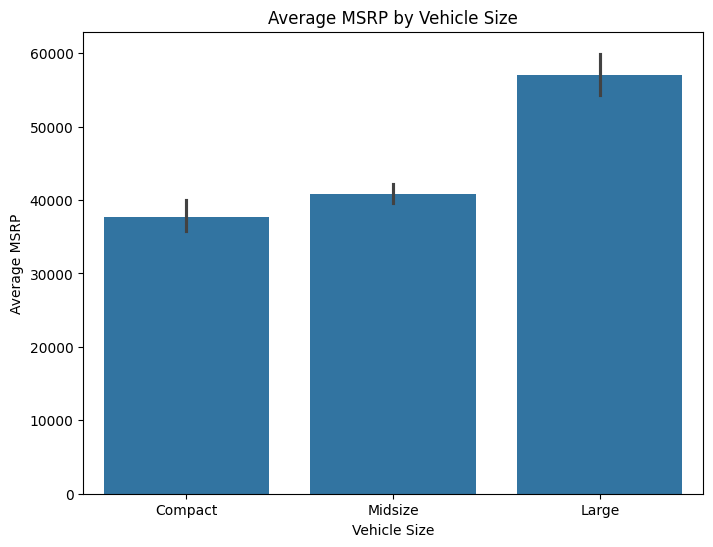

In [ ]:
# Bar chart for average MSRP by Vehicle Size
plt.figure(figsize=(8, 6))
sns.barplot(x='Vehicle Size', y='MSRP', data=data)
plt.title('Average MSRP by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Average MSRP')
plt.show()

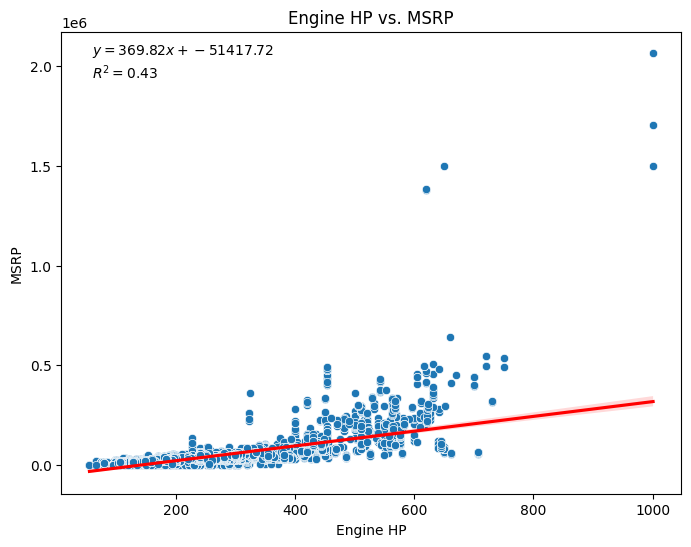

In [ ]:
# Scatter plot for Engine HP vs. MSRP
# Draw regression line, put equation and r-squared value to plot
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(data['Engine HP'], data['MSRP'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine HP', y='MSRP', data=data)
sns.regplot(x='Engine HP', y='MSRP', data=data, scatter=False, color='red', label='Regression Line')

# Get plot limits to position annotation dynamically
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

# Annotate with the equation and R^2 value
plt.annotate(
    f"$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_value**2:.2f}$",
    xy=(x_min + (x_max - x_min) * 0.05, y_max - (y_max - y_min) * 0.1)
)

plt.title('Engine HP vs. MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

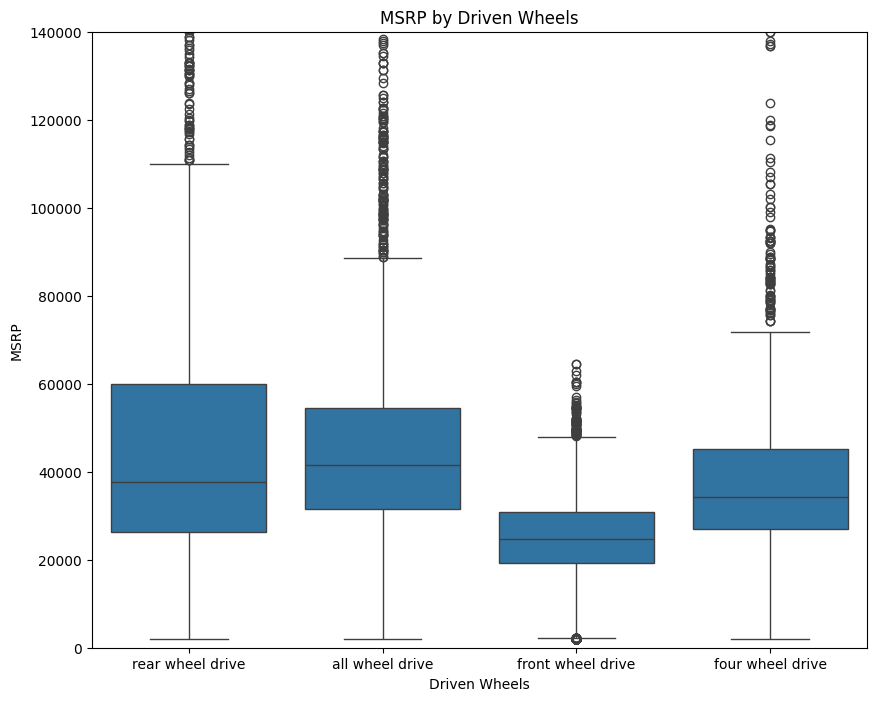

In [ ]:
# Boxplot for MSRP by Driven_Wheels
plt.figure(figsize=(10, 8))
sns.boxplot(x='Driven_Wheels', y='MSRP', data=data)
plt.title('MSRP by Driven Wheels')
plt.xlabel('Driven Wheels')
plt.ylabel('MSRP')
plt.ylim(0, 140000)
plt.show()

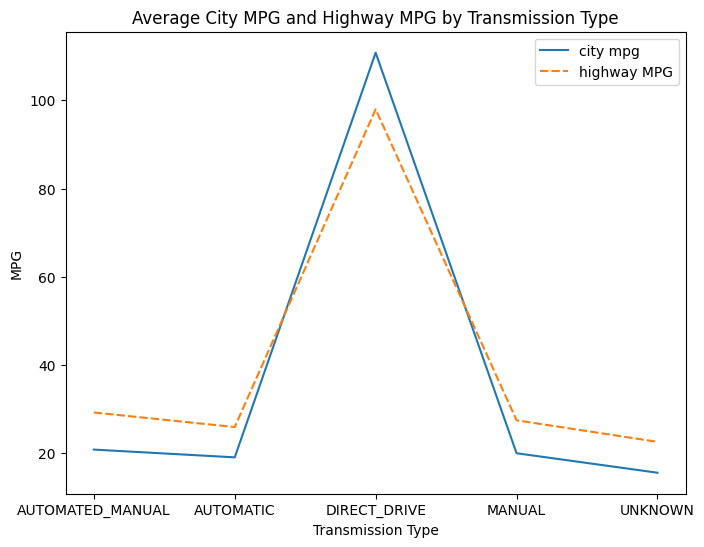

In [ ]:
# Line plot for city mpg and highway MPG trends by Transmission Type
plt.figure(figsize=(8, 6))
avg_mpg_transmission = data.groupby('Transmission Type')[['city mpg', 'highway MPG']].mean()
sns.lineplot(data=avg_mpg_transmission, legend='auto')
plt.title('Average City MPG and Highway MPG by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('MPG')
plt.show()

##Correlation Analysis

In [ ]:
# Correlation analysis
correlation_columns = ['Engine HP', 'MSRP', 'Popularity', 'city mpg', 'highway MPG']
correlation_matrix = data[correlation_columns].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
              Engine HP      MSRP  Popularity  city mpg  highway MPG
Engine HP     1.000000  0.653745    0.030934 -0.377650    -0.391037
MSRP          0.653745  1.000000   -0.057247 -0.173938    -0.182488
Popularity    0.030934 -0.057247    1.000000 -0.004153    -0.022427
city mpg     -0.377650 -0.173938   -0.004153  1.000000     0.886040
highway MPG  -0.391037 -0.182488   -0.022427  0.886040     1.000000


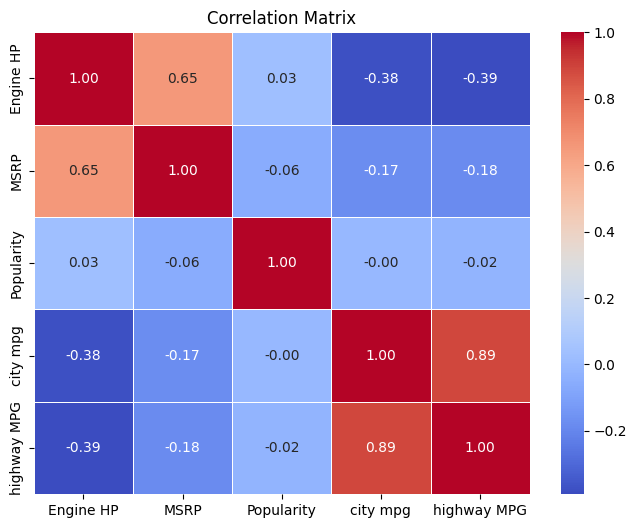

In [ ]:
# Extra Heatmap for the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#Clean Dataset Download

In [ ]:
from google.colab import files

# Save the cleaned dataset locally
data = data.copy()
student_name = 'Emre_Kirgin' # introduce your name here joining the surname with a _
data.to_csv(f'cleaned_data_{student_name}.csv', index=False)

# Allow download for manual upload
files.download(f'cleaned_data_{student_name}.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Summary

The exploratory data analysis revealed several key insights. The MSRP values show a wide range, with significant price variations depending on factors like Driven Wheels, Engine HP, and Vehicle Size. The boxplot for Driven Wheels indicates that front wheel drive has lower median prices compared to other categories. Additionally, the scatter plot between Engine HP and MSRP suggests a positive correlation, meaning that higher horsepower generally leads to higher vehicle prices.

From the trend analysis of fuel efficiency, vehicles with direct drive tend to have worse city and highway MPG compared to other categories. The correlation matrix highlights a moderate negative correlation between Engine HP and fuel efficiency (MPG), confirming that higher-powered vehicles tend to consume more fuel. Overall, these patterns help in understanding how pricing, performance, and efficiency interact in the automotive market.